In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


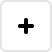
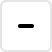
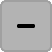
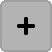
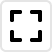
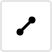
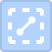
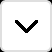
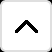
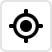
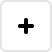
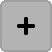
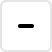
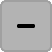
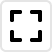
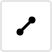
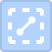
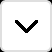
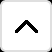
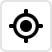

In [2]:
LetsPlot.setup_html()

##### Helpers

In [3]:
def dump_plot(plot, display=False):
    import json

    import clipboard
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    clipboard.copy('')
    clipboard.copy(str(plot_json))

    if display:
        print(plot_json)

# See the "Expands break plots" section
no_expand = scale_x_continuous(expand=[0, 0]) + scale_y_continuous(expand=[0, 0])

## Rect with `coord_polar`

In [4]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=5, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=7, ymax=11, fill='green', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=11, ymax=14, fill='blue', size=0) \

gggrid([
    p, 
    p + no_expand + coord_polar(theta='y') + ggtitle("coord_polar(theta='y')"),
    p + no_expand + coord_polar(theta='x') + ggtitle("coord_polar(theta='x')"),
])


## Bar plot with `coord_polar`

In [5]:
from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=-1)), size=0)

#dump_plot(p + no_expand + coord_polar(theta='y'))

grd = gggrid([
    p,
    p + no_expand + coord_polar(theta='y') + ggtitle("coord_polar(theta='y')"),
    p + no_expand + coord_polar(theta='x') + ggtitle("coord_polar(theta='x')"),
])
dump_plot(grd)
grd

## Scatter plot with `coord_polar` 

In [6]:
labels_df = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'y': [0, 45, 90, 135, 180, 225, 270, 315, 360],
    'l': ['0', '45', '90', '135', '180', '225', '270', '315', '360']
}

p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_label() + xlab("") + ylab("")
grd = gggrid([
    p,
    p + coord_polar(theta="y") + no_expand
])
dump_plot(grd)
grd

## Path with `coord_polar`

In [7]:
p = ggplot(labels_df, aes(x='x', y='y')) + geom_path() + no_expand
gggrid([
    p,
    p + no_expand + coord_polar(theta="y")
])

### Expands break plots
Default expands break a plot - transform was built and normalized on extended domain, so the transform never returns the maximum angle because the input data never reaches the maximum value.

In [8]:
ggplot(labels_df, aes(x='x', y='y', label='l')) \
    + geom_label() \
    + coord_polar(theta="y") \
    + ggtitle("Incorrect angles with the default expand")